<a href="https://colab.research.google.com/github/venkateshblks/Multi-Linear-Regression/blob/main/Toyoto_Corrola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consider only the below columns and prepare a prediction model for predicting Price.**

**Corolla <-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]**



Model -- model of the car     
*Price  -- Offer Price in EUROs*  
Age_08_04 -- Age in months as in August 2004	  
Mfg_Month -- Manufacturing month (1-12)
Mfg_Year	-- Manufacturing Year   
KM -- Accumulated Kilometers on odometer  
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)   
HP -- Horse Power   
Met_Color	 -- Metallic Color?  (Yes=1, No=0)  
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)   
Automatic	-- Automatic ( (Yes=1, No=0)  
cc -- Cylinder Volume in cubic centimeters  
Doors -- Number of doors  
Cylinders	-- Number of cylinders  
Gears -- Number of gear positions   
Quarterly_Tax -- Quarterly road tax in EUROs  
Weight -- Weight in Kilograms   
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)  
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)  
Guarantee_Period -- 	Guarantee period in months  
ABS -- Anti-Lock Brake System (Yes=1, No=0)   
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)  
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)   
Airco -- Airconditioning  (Yes=1, No=0)   
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)   
Boardcomputer -- Boardcomputer  (Yes=1, No=0)   
CD_Player -- CD Player  (Yes=1, No=0)   
Central_Lock -- Central Lock  (Yes=1, No=0)   
Powered_Windows -- Powered Windows  (Yes=1, No=0)     
Power_Steering -- Power Steering  (Yes=1, No=0)   
Radio -- Radio  (Yes=1, No=0)   
Mistlamps	-- Mistlamps  (Yes=1, No=0)   
Sport_Model -- Sport Model  (Yes=1, No=0)   
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)   
Metallic_Rim --Metallic Rim  (Yes=1, No=0)    
Radio_cassette -- Radio Cassette  (Yes=1, No=0)   
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Toyoto_Corrola.csv')


In [28]:
print(data.shape)
data.head()

(1436, 10)


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [29]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [30]:
data1=data.drop(['Id','Model'],axis=1)
data1.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [31]:
data1.Cylinders.value_counts()

4    1436
Name: Cylinders, dtype: int64

In [32]:
print(data1[['Gears']].value_counts())
data1[['Doors']].value_counts()

Gears
5        1390
6          43
3           2
4           1
dtype: int64


Doors
5        674
3        622
4        138
2          2
dtype: int64

In [33]:
data2=data1.drop(['Cylinders'],axis=1)
data2.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Gears      1436 non-null   int64
 6   Weight     1436 non-null   int64
dtypes: int64(7)
memory usage: 78.7 KB


In [35]:
data2.rename(columns = {'Age_08_04':'Age'}, inplace = True)
data2.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [36]:
data2.isna().sum()

Price     0
Age       0
KM        0
HP        0
Doors     0
Gears     0
Weight    0
dtype: int64

In [37]:
data2[data2.duplicated()]

,Price,Age,KM,HP,Doors,Gears,Weight
113,24950,8,13253,116,5,5,1320


In [38]:
print(data2.shape)
data3=data2.drop_duplicates()
# data3[data3.duplicated()]
data3.shape

(1436, 7)


(1435, 7)

In [39]:
data3.describe()

,Price,Age,KM,HP,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,4.032753,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,5.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,6.000000,1615.000000


In [40]:
data3.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,0.021238,1.000000


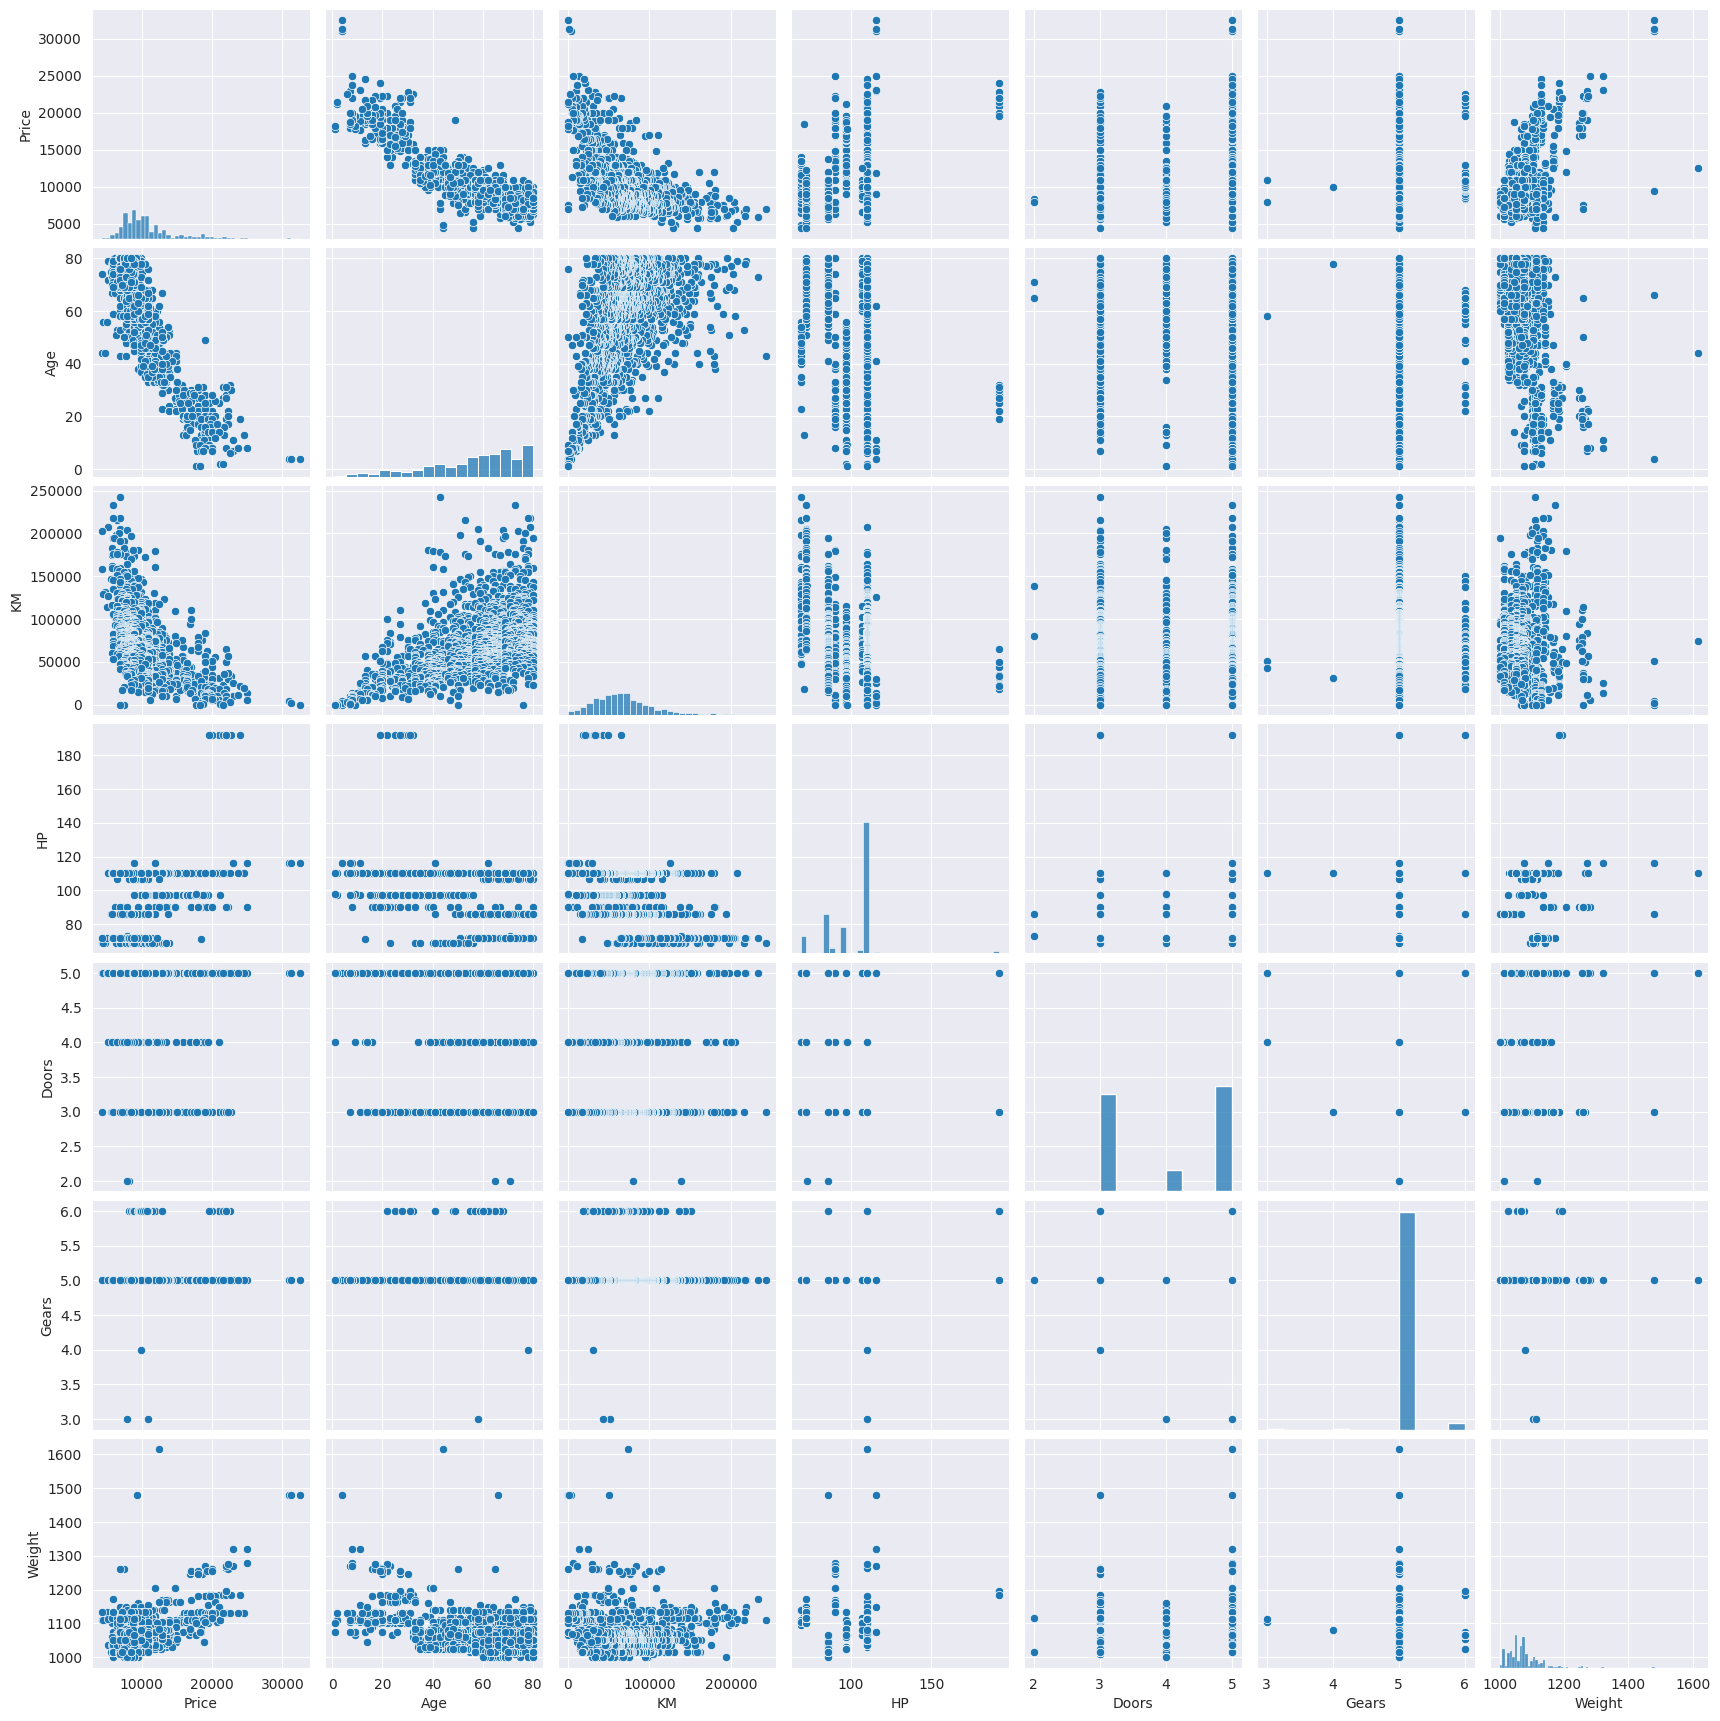

In [41]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

# preparing a model

In [42]:
data3.columns

Index(['Price', 'Age', 'KM', 'HP', 'Doors', 'Gears', 'Weight'], dtype='object')

In [43]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1482.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:38:59   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6838.9872   1313.977     -5.205      0.000   -9416.519   -4261.456
Age         -122.2882      2.614    -46.775      0.000    -127.417    -117.160
KM            -0.0199      0.001    -16.490      0.000      -0.022      -0.018
HP            28.3278      2.613     10.841      0.000      23.202      33.454
Doors         -8.7158     39.970     -0.218      0.827     -87.121      69.690
Gears        625.2978    197.289      3.169      0.002     238.291    1012.305
Weight        18.4551      0.834     22.142      0.000      16.820      20.090
==============================================================================
Omnibus:                      194.732   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1529.680
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model2=smf.ols('Price~Age+KM+HP+Gears+Weight',data=data3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1779.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:38:59   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6858.9338   1310.352     -5.234      0.000   -9429.353   -4288.514
Age         -122.2896      2.614    -46.791      0.000    -127.416    -117.163
KM            -0.0199      0.001    -16.498      0.000      -0.022      -0.018
HP            28.2672      2.597     10.883      0.000      23.172      33.362
Gears        633.6397    193.480      3.275      0.001     254.105    1013.175
Weight        18.4078      0.804     22.882      0.000      16.830      19.986
==============================================================================
Omnibus:                      193.475   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.136
Skew:                          -0.356   Prob(JB):                         0.00
Kurtosis:                       7.980   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Calculating vif


In [45]:
rsq_Age = smf.ols('Age~KM+HP+Gears+Weight',data=data3).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Gears+Weight',data=data3).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+Gears+Weight',data=data3).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_Weight = smf.ols('Weight~Age+KM+HP+Gears',data=data3).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)
rsq_Gears = smf.ols('Gears~Age+KM+HP+Weight',data=data3).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP', 'Weight','Gears'],'VIF':[vif_Age,vif_KM,vif_HP, vif_Weight,vif_Gears]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.866045
1,KM,1.626160
2,HP,1.200443
3,Weight,1.400791
4,Gears,1.055346


## residual analysis

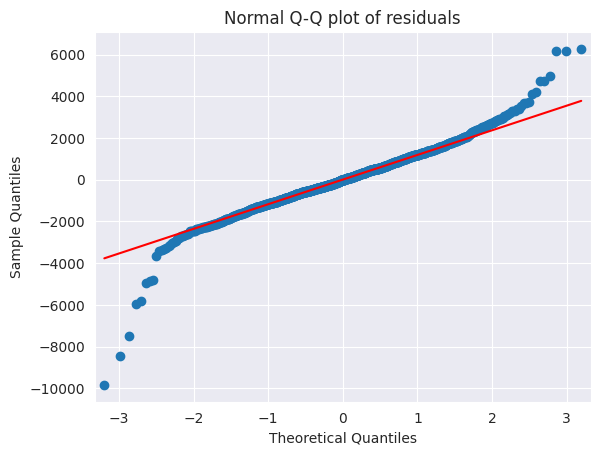

In [46]:
import statsmodels.api as sm

#model = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

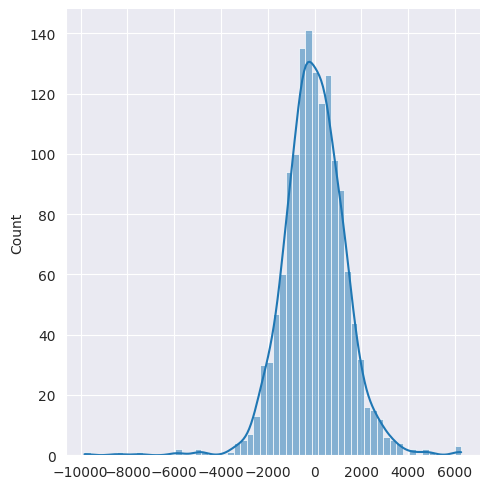

In [47]:
sns.displot(model2.resid, kde = True)

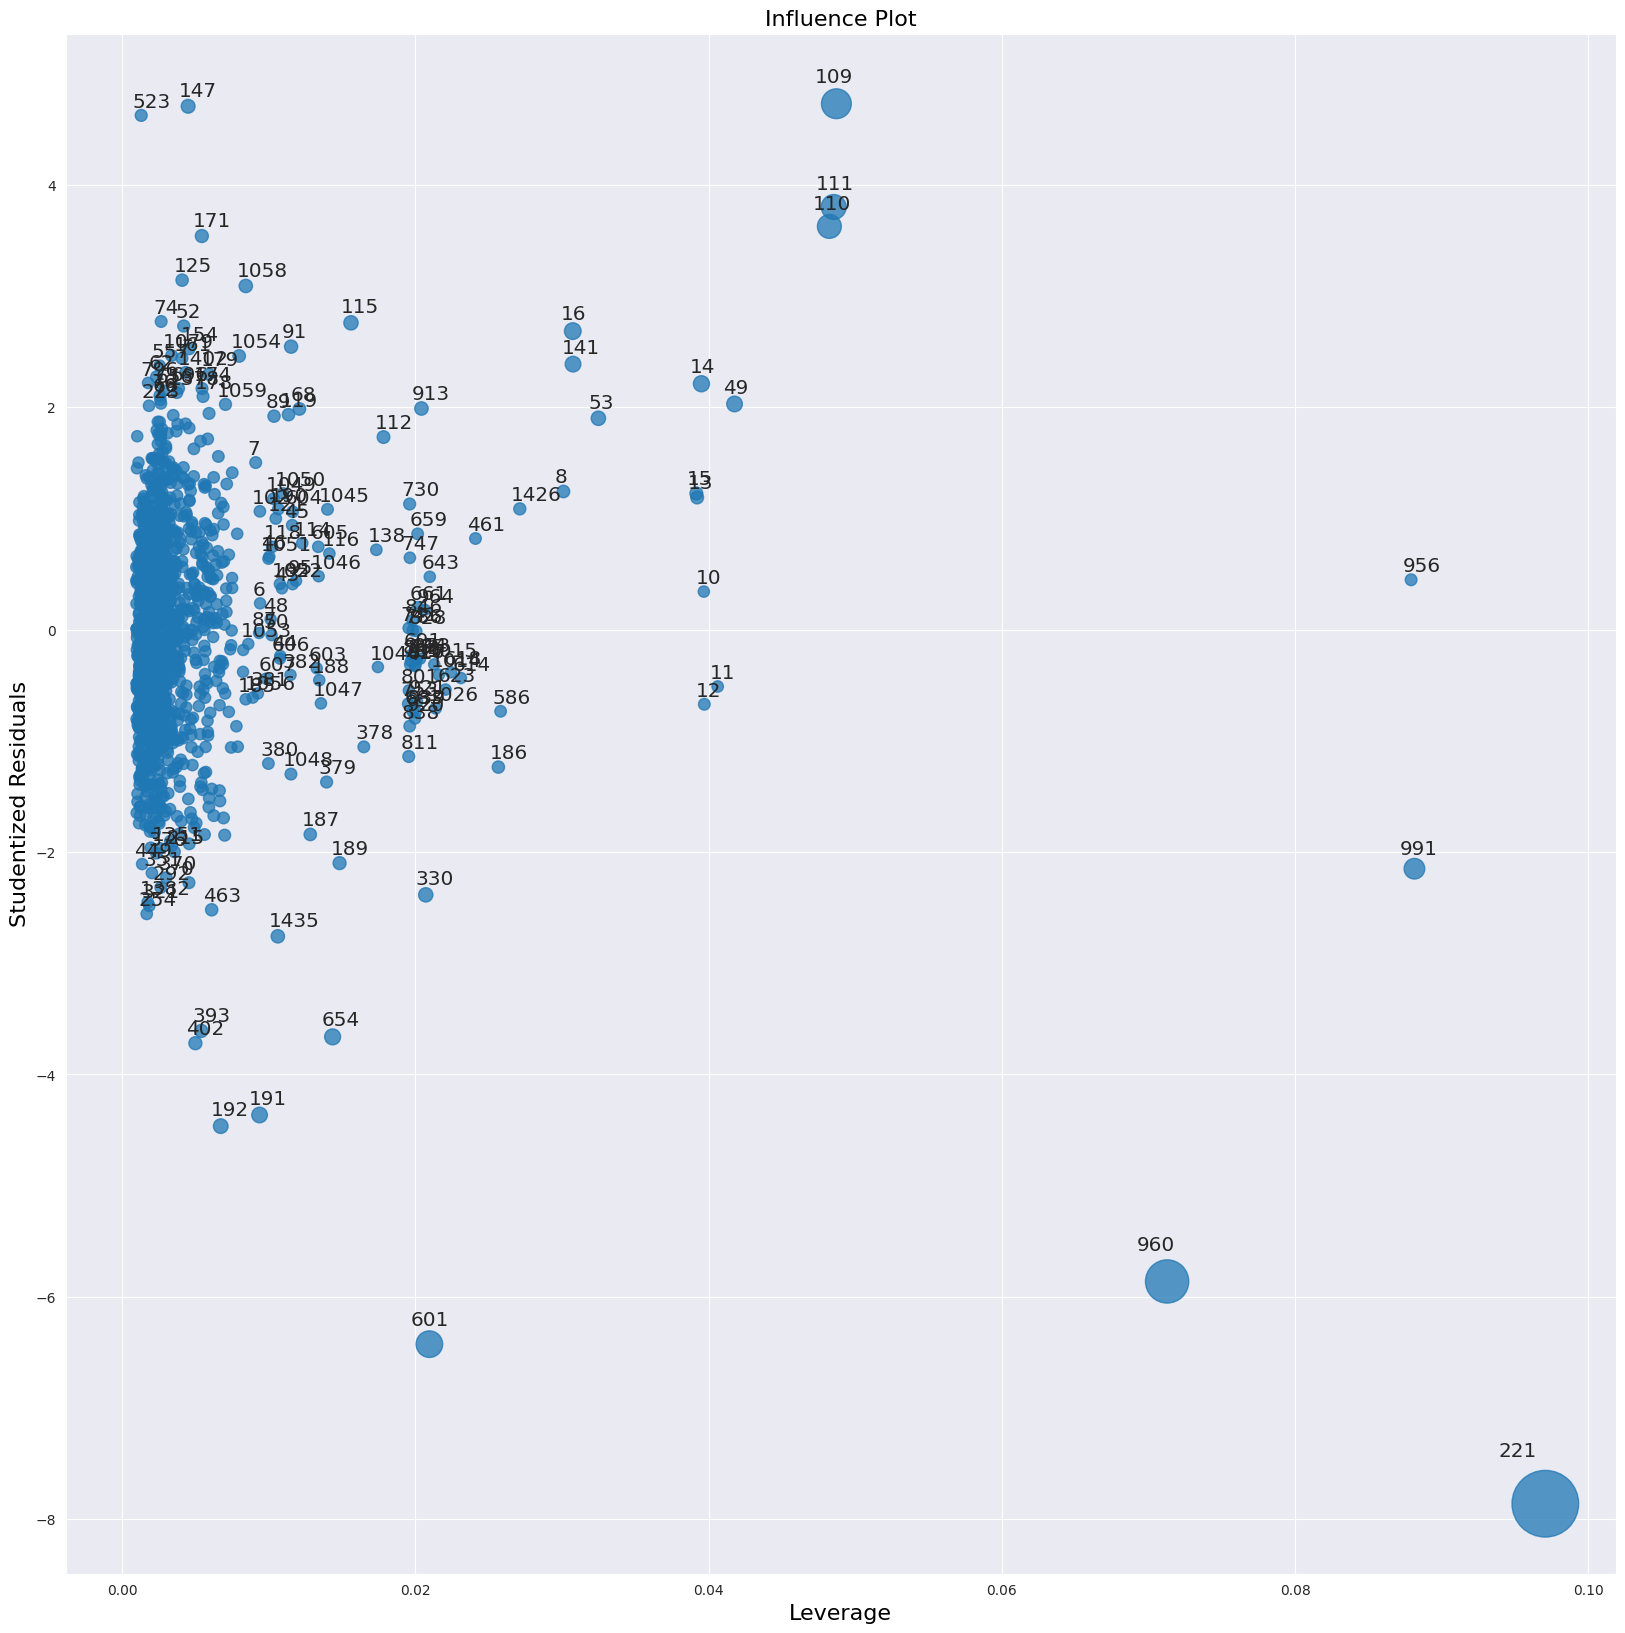

In [48]:
fig,ax=plt.subplots(figsize=(20,20))
fig=sm.graphics.influence_plot(model2,ax=ax)


In [49]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

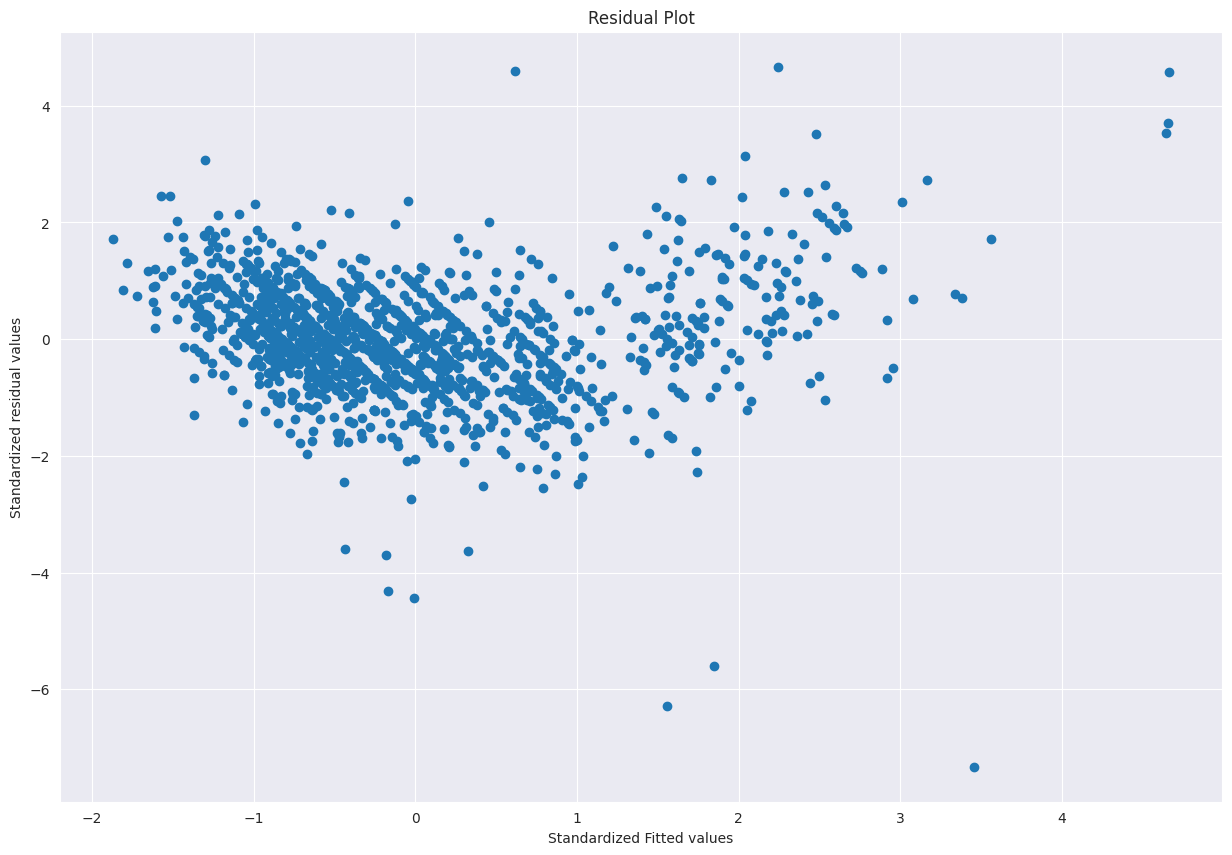

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Model Deletion Diagnostics

In [51]:
#cooks distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.93924314e-03, 2.30339635e-03, 2.83660590e-03, ...,
       5.31781599e-06, 8.90335589e-04, 1.35423675e-02])

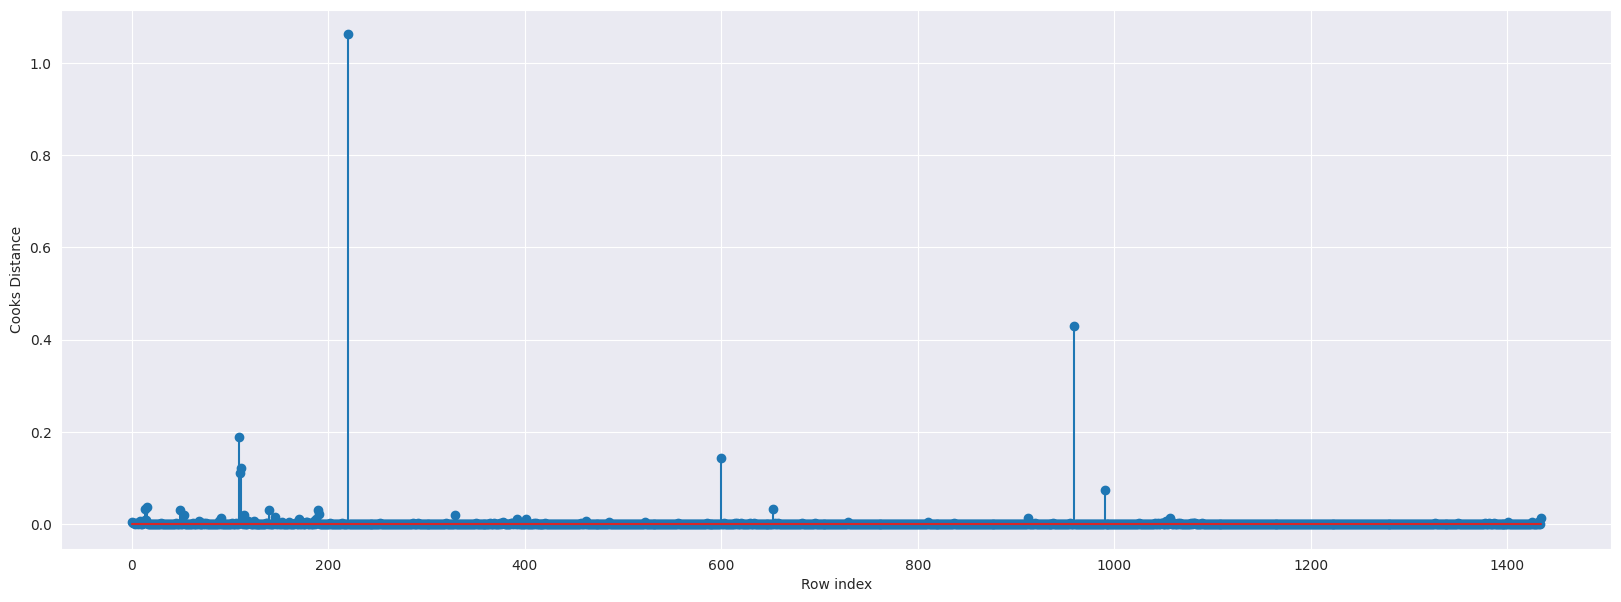

In [52]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
k = data3.shape[1]
n = data3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.016724738675958188

In [54]:
np.argmax(c),np.max(c)

(220, 1.0617659302005542)

In [55]:
data3[data3.index.isin([220])]

,Price,Age,KM,HP,Doors,Gears,Weight
220,11950,43,74285,110,5,5,1075


In [56]:
data3.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [57]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data4=data3.drop(data1.index[220],axis=0).reset_index()
data4=data4.drop(['index'],axis=1)
data4.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [58]:
print(data3.shape)
data4.shape

(1435, 7)


(1434, 7)

In [59]:
model3=smf.ols('Price~Age+KM+HP+Gears+Weight',data=data4).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1778.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:39:04   Log-Likelihood:                -12363.
No. Observations:                1434   AIC:                         2.474e+04
Df Residuals:                    1428   BIC:                         2.477e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6851.6292   1310.879     -5.227      0.000   -9423.085   -4280.173
Age         -122.3184      2.615    -46.769      0.000    -127.449    -117.188
KM            -0.0199      0.001    -16.479      0.000      -0.022      -0.018
HP            28.2879      2.599     10.885      0.000      23.190      33.386
Gears        633.0035    193.545      3.271      0.001     253.341    1012.666
Weight        18.4031      0.805     22.867      0.000      16.824      19.982
==============================================================================
Omnibus:                      193.228   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1508.043
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                       7.973   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
(cooks,_)=model3.get_influence().cooks_distance
cooks

array([3.93850420e-03, 2.30434516e-03, 2.83586589e-03, ...,
       5.39148438e-06, 8.89133835e-04, 1.35317614e-02])

<StemContainer object of 3 artists>

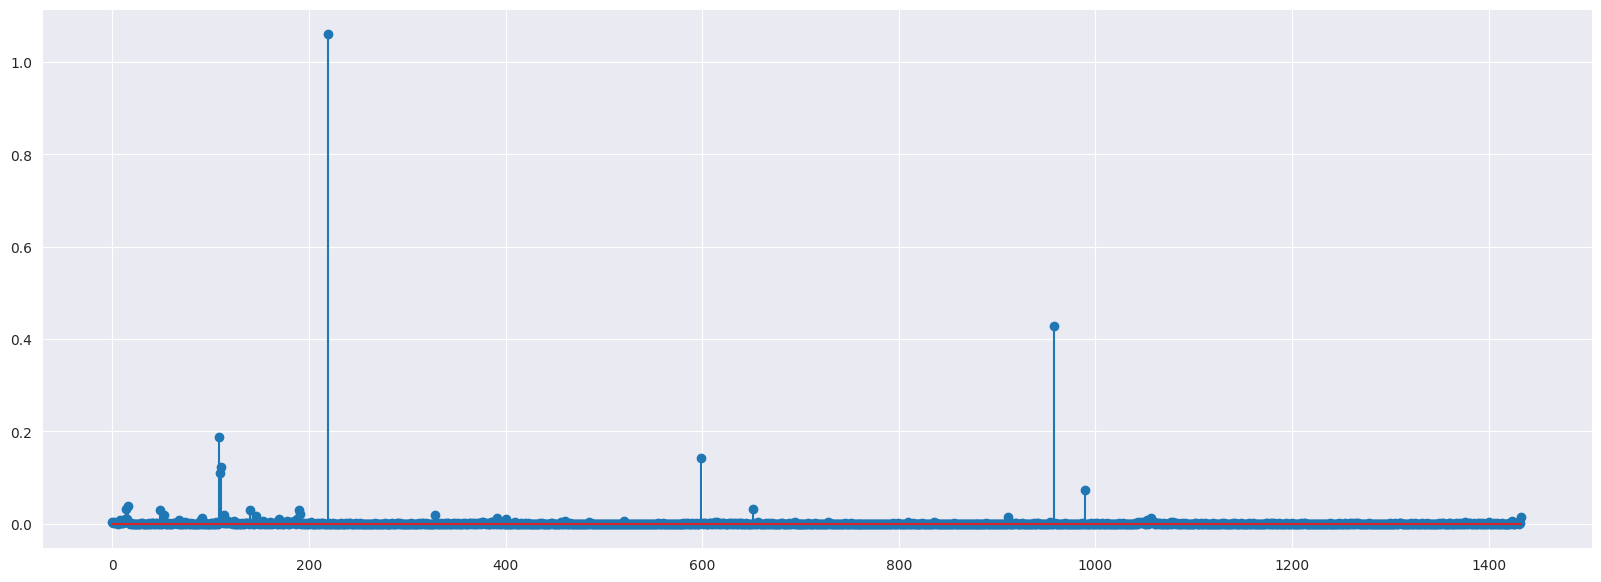

In [61]:
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(cooks,3))

In [62]:
(np.argmax(cooks),np.max(cooks))

(219, 1.060916081628967)

In [63]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data5=data4.drop(data1.index[219],axis=0).reset_index()
data5=data5.drop(['index'],axis=1)
data5.shape

(1433, 7)

In [64]:
model4=smf.ols('Price~Age+KM+HP+Gears+Weight',data=data5).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1865.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:39:04   Log-Likelihood:                -12324.
No. Observations:                1433   AIC:                         2.466e+04
Df Residuals:                    1427   BIC:                         2.469e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9052.2874   1314.064     -6.889      0.000   -1.16e+04   -6474.583
Age         -119.2546      2.591    -46.027      0.000    -124.337    -114.172
KM            -0.0206      0.001    -17.373      0.000      -0.023      -0.018
HP            27.9860      2.545     10.994      0.000      22.993      32.979
Gears        624.3340    189.559      3.294      0.001     252.489     996.179
Weight        20.4170      0.829     24.633      0.000      18.791      22.043
==============================================================================
Omnibus:                      150.517   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.508
Skew:                          -0.265   Prob(JB):                    5.83e-200
Kurtosis:                       6.884   Cond. No.                     2.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<StemContainer object of 3 artists>

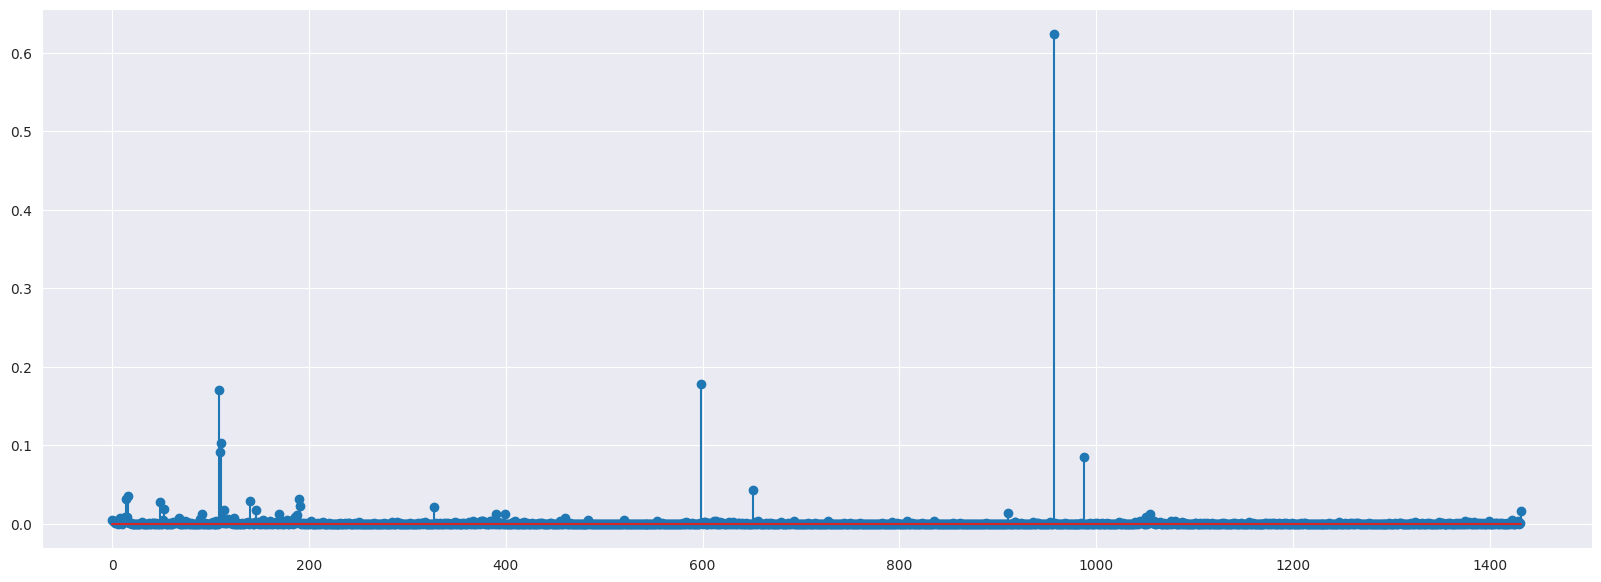

In [65]:
(cooks,_)=model4.get_influence().cooks_distance
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)),np.round(cooks,3))

In [66]:
(np.argmax(cooks),np.max(cooks))

(957, 0.6235720530916734)

In [67]:
data5['predicted Price']=model4.fittedvalues

In [68]:
data5.head()

,Price,Age,KM,HP,Doors,Gears,Weight,predicted Price
0,13500,23,46986,90,3,5,1165,16661.924969
1,13750,23,72937,90,3,5,1165,16126.656829
2,13950,24,41711,90,3,5,1165,16651.473044
3,14950,26,48000,90,3,5,1165,16283.246154
4,13750,30,38500,90,3,5,1170,16104.260581


In [69]:
models_data={'Models':['model','model2','model3','model4'],'rsquared':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
             'adj_rsuared':[model.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj],
             'Aic':[model.aic,model2.aic,model3.aic,model4.aic],
             'Bic':[model.bic,model2.bic,model3.bic,model4.bic]
             }

In [70]:
pd.DataFrame(models_data)

,Models,rsquared,adj_rsuared,Aic,Bic
0,model,0.861595,0.861013,24756.033307,24792.915747
1,model2,0.861590,0.861106,24754.081089,24785.694610
2,model3,0.861593,0.861109,24737.689671,24769.299009
3,model4,0.867311,0.866846,24660.763049,24692.368202
